# Estudos - OpenCV

# Aula 002 - Manipulação de pixels, imagens P&B e região de interesse

# Versões do Python e das bibliotecas usadas

- Python == 3.9.25
- Opencv == 4.12.0.88
- Numpy == 2.0.2
- Matplotlib == 3.9.4

> Vamos prosseguir fazendo a visualização de imagens com o matplotlib!

# 0 - Revisão - Aula anterior (001)

- Leitura e exibição de imagens
- Conversão de cores BGR para RGB

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

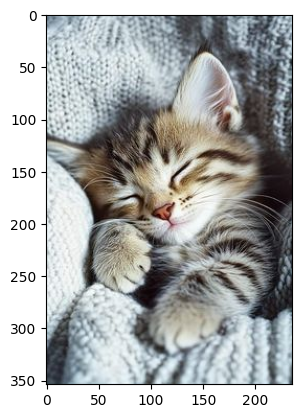

In [2]:
obj_img = cv2.imread('imagens/cat.png')
obj_img = cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB)
plt.imshow(obj_img)
plt.show()

# 1 - Manipulando cores no OpenCV

## 1.1 - Exibindo uma imagem em preto e branco

É comum que em visão computacional a gente utilize imagens em escala de cinza. 

Isso acaba tornando, por exemplo, a detecção de faces, objetos e afins, muito mais eficiente.

Para ler e exibir uma imagem em preto e branco, podemos fazer isso de dois jeitos:
- Adicionando um parâmetro que modifica as cores diretamente na leitura da imagem
- Usando novamente o `cv2.cvtColor`

Vamos fazer dos dois jeitos. (Usaremos a imagem "cat")

### Lendo e exibindo uma imagem em preto e branco com `cv2.imread`

In [3]:
obj_img = cv2.imread('imagens/cat.png', 0)

In [4]:
obj_img = cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB)

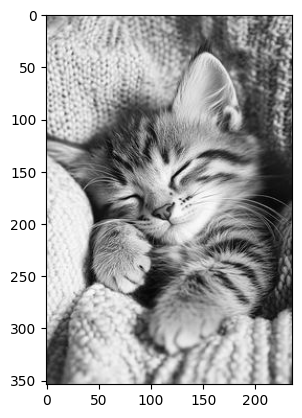

In [5]:
plt.imshow(obj_img)
plt.show()

### O que esse código acima fez?
- Fez a leitura da imagem, porém em escala de cinza (grayscale), por conta do 0;
- O 0 (zero) consiste em uma flag de leitura da imagem. Se fosse 1, teríamos a imagem colorida (BGR), se fosse -1, teríamos uma imagem que iria manter tudo, incluindo o canal alpha.
- Mesmo que a gente tenha colocado a imagem em escala de cinza já no `imread`, ainda sim temos que converter de BGR para RGB, se não teríamos uma exibição em uma paleta de cores totalmente diferente e colorida

Vamos fazer logo abaixo os testes com o parâmetro -1, 1 e sem converter de BGR para RGB

#### Flag -1 no `imread()`

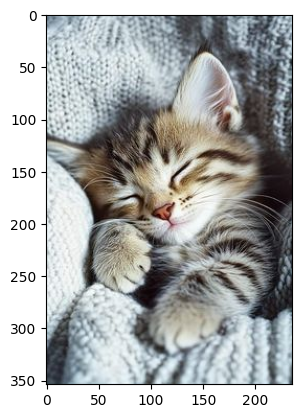

In [6]:
obj_img = cv2.imread('imagens/cat.png', -1)
obj_img = cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB) 
plt.imshow(obj_img)
plt.show()

#### Flag 1 no `imread()`

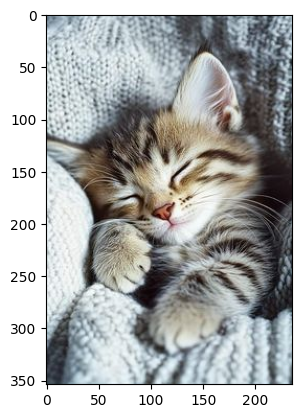

In [7]:
obj_img = cv2.imread('imagens/cat.png', 1)
obj_img = cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB) 
plt.imshow(obj_img)
plt.show()

#### Escala de cinza sem `cvtColor`

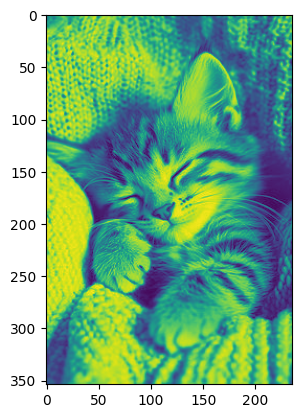

In [8]:
obj_img = cv2.imread('imagens/cat.png', 0)
plt.imshow(obj_img)
plt.show()

> Relembrando: é necessário converter de BGR para RGB porque estamos exibindo as imagens usando Matplotlib, que trabalha com RGB.
> Caso a exibição seja feita diretamente pelo cv2.imshow, não é necessária a conversão

## 1.2 - Como o OpenCV trabalha com as imagens?

Sempre que enviamos uma imagem para ser lida no OpenCV, ele armazena informações da imagem em um array.

Vamos ver as informações de `obj_img` usando `.shape`

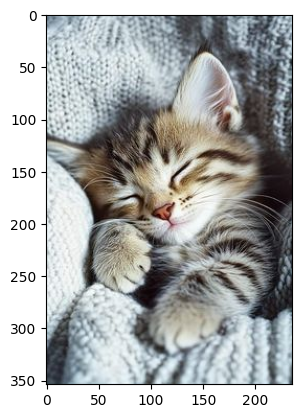

In [9]:
obj_img = cv2.imread('imagens/cat.png')
obj_img = cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB)
plt.imshow(obj_img)
plt.show()

In [10]:
print(obj_img.shape, type(obj_img))

(354, 236, 3) <class 'numpy.ndarray'>


O `.shape` nos retornou informações importantes da imagem:
- Altura: 354px
- Largura: 236px
- Quantidade de canais de cores: 3 (B,G,R)

O tipo do nosso `obj_img` é um *ndarray*

> IMPORTANTE: O OpenCV trabalha com as dimensões da imagem em ALTURA X LARGURA. Saber disso ajuda bastante a não confundir as dimensões da imagem que estamos trabalhando, visto que é comum vermos as dimensões como LARGURA X ALTURA, enquanto no OpenCV é o contrário.

### Armazenando a altura, largura e canais de cores em variáveis separadas

Algo interessante e mais organizado que nós podemos fazer é pegar cada informação do shape e armazenar em uma variável própria.

Assim, podemos acessar de forma mais fácil as informações de altura, largura e canais de cores da imagem. Isso ajuda bastante quando precisamos manipular a imagem.

In [11]:
altura, largura, canais_de_cor = obj_img.shape 

In [12]:
print(f'''
Dimensões da imagem: {largura}x{altura} (largura x altura)
Canais de cor: {canais_de_cor}
''')


Dimensões da imagem: 236x354 (largura x altura)
Canais de cor: 3



#### Como seria o shape da imagem se ela estiver em escala de cinza?

In [13]:
teste_escala_cinza = cv2.imread('imagens/cat.png', 0)
print(teste_escala_cinza.shape)

(354, 236)


Temos um array com apenas os valores de altura e largura.

Por conta da imagem estar em escala de cinza, ele não possui mais canais BGR, mas sim um único canal implícito que irá variar de 0 a 255 (por isso temos a imagem em preto e branco).

De forma geral:
- A imagem não possui mais BGR
- A imagem agora possui apenas 1 canal, que varia a sua intensidade de 0 (áreas mais escuras) a 255 (áreas mais claras)
- Mesmo que ainda tenha esse canal de 0-255, o OpenCV não cria uma dimensão pra ele no array, o que o torna um canal "implícito"

## 1.3 - Manipulando pixels

### Primeiramente, como uma máquina enxerga uma imagem?


De forma geral, as imagens são armazenadas na forma de uma matriz numérica que contém 3 dimensões (R,G,B).

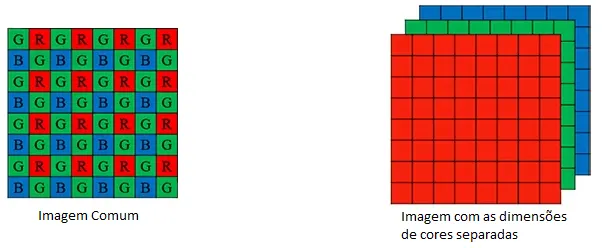


Diante disso, temos então os pixels.
O pixel (picture element) é o menor ponto de cor em uma imagem, e é justamente por eles que a gente se orienta dentro das matrizes.

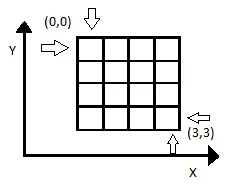

Dentro de um pixel, temos então as 3 dimensões de cores (R,G,B), que vão variar de 0 a 255.

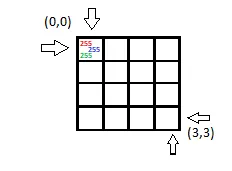

A forma final seria assim...

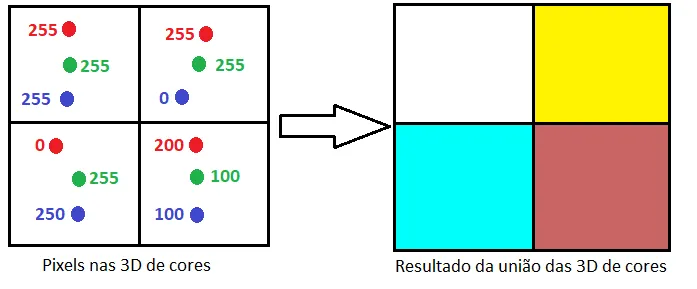


> Referência: https://medium.com/@NicolasfMelo/introdu%C3%A7%C3%A3o-ao-opencv-python-7b41e50b9ce3

### Percorrendo cada linha e coluna da imagem com loop for

In [14]:
for y in range(0, altura): 
    for x in range(0, largura):
        print(f'''
            Y, X, Cores BGR
            {y, x}, {obj_img[y][x]}
            ''')


            Y, X, Cores BGR
            (0, 0), [ 87 105 119]
            

            Y, X, Cores BGR
            (0, 1), [103 121 135]
            

            Y, X, Cores BGR
            (0, 2), [128 146 160]
            

            Y, X, Cores BGR
            (0, 3), [142 160 174]
            

            Y, X, Cores BGR
            (0, 4), [134 152 166]
            

            Y, X, Cores BGR
            (0, 5), [116 134 148]
            

            Y, X, Cores BGR
            (0, 6), [113 131 145]
            

            Y, X, Cores BGR
            (0, 7), [121 139 153]
            

            Y, X, Cores BGR
            (0, 8), [145 163 177]
            

            Y, X, Cores BGR
            (0, 9), [165 183 197]
            

            Y, X, Cores BGR
            (0, 10), [174 192 206]
            

            Y, X, Cores BGR
            (0, 11), [171 189 203]
            

            Y, X, Cores BGR
            (0, 12), [174 192 206]
            

        

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




            Y, X, Cores BGR
            (314, 147), [176 187 191]
            

            Y, X, Cores BGR
            (314, 148), [179 190 194]
            

            Y, X, Cores BGR
            (314, 149), [178 189 193]
            

            Y, X, Cores BGR
            (314, 150), [173 184 190]
            

            Y, X, Cores BGR
            (314, 151), [167 178 184]
            

            Y, X, Cores BGR
            (314, 152), [161 172 178]
            

            Y, X, Cores BGR
            (314, 153), [154 165 171]
            

            Y, X, Cores BGR
            (314, 154), [140 150 159]
            

            Y, X, Cores BGR
            (314, 155), [127 140 148]
            

            Y, X, Cores BGR
            (314, 156), [130 143 151]
            

            Y, X, Cores BGR
            (314, 157), [149 162 170]
            

            Y, X, Cores BGR
            (314, 158), [174 187 195]
            

            Y, X, Cores BGR
           

Como vimos na explicação, uma máquina enxerga uma imagem como uma matriz.
Para cada pixel dessa matriz, temos as 3 dimensões de cores.

Com base nisso, criamos um loop for que:
- Percorre a altura da imagem (y)
- Percorre a largura da imagem (x)
- Com base nas coordenadas y e x, retorna as cores em BGR de cada coordenada, de cada pixel da matriz
- Como exemplo: na coordenada (0, 0) temos o BGR [ 87 105 119], e por aí vai, de coordenada por coordenada, até o final da imagem

> IMPORTANTE: Nesse array das cores de cada pixel, no índice 0 temos a cor azul, no índice 1 temos a cor verde e no índice 2 temos a cor vermelha

### Armazenando as cores de cada pixel da imagem em variáveis separadas

É possível manipular as cores de uma imagem armazenando cada canal de cor em uma variável separada

Podemos fazer isso de duas formas:
- Acessando as cores por indexação ```azul, verde, vermelho = obj_img[y][x]```
- Utilizando `item()` -> MELHOR OPÇÃO COM BASE NA DOCUMENTAÇÃO DO OPENCV

In [15]:
for y in range(0, altura): 
    for x in range(0, largura):

        azul = obj_img.item(y, x, 0)
        verde = obj_img.item(y, x, 1)
        vermelho = obj_img.item(y, x, 2)

### Agora que temos as cores armazenadas separadamente, vamos manipular as cores da nossa imagem original

#### Deixando nossa imagem verde

In [16]:
imagem_original = cv2.imread('imagens/cat.png')

In [17]:
obj_img = imagem_original.copy()

In [18]:
altura, largura, cores = obj_img.shape

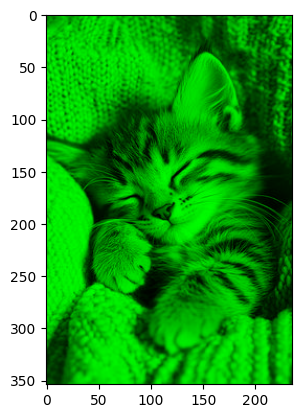

In [19]:
for y in range(0, altura): 
    for x in range(0, largura):

        azul = obj_img.item(y, x, 0)
        verde = obj_img.item(y, x, 1)
        vermelho = obj_img.item(y, x, 2)

        obj_img[y, x] = [0, verde, 0]
    
plt.imshow(obj_img)
plt.show()

#### Deixando nossa imagem azul

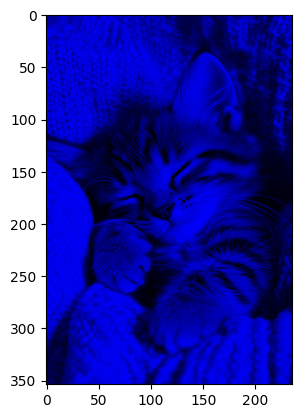

In [20]:
obj_img = imagem_original.copy()

for y in range(0, altura): 
    for x in range(0, largura): 
        azul = obj_img.item(y, x, 0)
        verde = obj_img.item(y, x, 1)
        vermelho = obj_img.item(y, x, 2)

        obj_img[y, x] = [azul, 0, 0]
        
plt.imshow(cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB))
plt.show()

####  Deixando nossa imagem vermelha

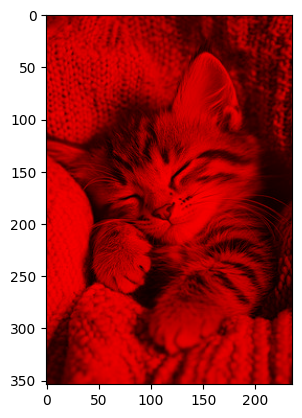

In [21]:
obj_img = imagem_original.copy()

for y in range(0, altura): 
    for x in range(0, largura): 
        azul = obj_img.item(y, x, 0)
        verde = obj_img.item(y, x, 1)
        vermelho = obj_img.item(y, x, 2)

        obj_img[y, x] = [0, 0, vermelho]
        
plt.imshow(cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB))
plt.show()

A partir dessas variáveis, conseguimos manipular a nossa imagem e os canais de cores para qualquer cor, incluindo rosa, ciano e amarelo.

# 2 - Salvando imagens com OpenCV

Vamos imaginar que somos Engenheiros de Visão Computacional e nosso cliente pediu para que deixássemos na cor ciano a imagem que ele nos enviou ("imagens/husky.jpeg").

Vamos fazer a conversão da imagem para ciano e vamos salvá-la, para então enviar o resultado final para nosso cliente.

> (off) Parece mais trabalho de um Designer do que de um Engenheiro de Visão Computacional, mas enfim, é para fins didáticos

In [22]:
# leitura da imagem 

imagem_husky = cv2.imread('imagens/husky.jpeg')

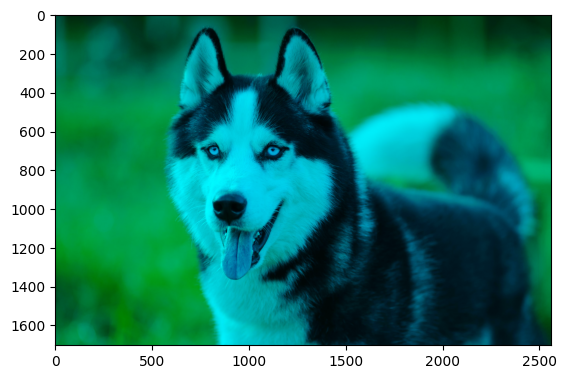

In [23]:
# convertendo para ciano 

altura, largura, cores = imagem_husky.shape

for y in range(0, altura):
    for x in range(0, largura): 

        azul = imagem_husky.item(y, x, 0)
        verde = imagem_husky.item(y, x, 1) 
        vermelho = imagem_husky.item(y, x, 2)
        
        imagem_husky[y, x] = [azul, verde, 0]

imagem_husky = cv2.cvtColor(imagem_husky, cv2.COLOR_BGR2RGB) 
plt.imshow(imagem_husky)
plt.show()

In [24]:
# salvando a imagem 

cv2.imwrite('husky_modificado_ciano.png', imagem_husky)

True

# Extraíndo uma região da imagem

É comum que em alguns projetos de visão computacional seja necessário extrair uma parte específica da imagem, que seria a região de interesse, com base óbviamente no problema de negócio a ser resolvido.

Um exemplo que podemos citar é em medicina, quando é feito o uso de visão computacional para detecção de câncer de mama. Precisamos extraír exatamente a região da imagem onde foi detectado o câncer. Não precisamos da imagem inteira...

In [25]:
imagem_original = cv2.imread('imagens/cat.png')

In [26]:
obj_img = imagem_original.copy()
obj_img = cv2.cvtColor(obj_img, cv2.COLOR_BGR2RGB)

Vamos selecionar e recortar apenas o rosto do gato (imagem cat.png)

### Primeiro, vamos criar uma grade, para saber as coordenadas dos pontos que precisamos extrair

In [27]:
alt, larg = obj_img.shape[:2]
print(alt, larg)

354 236


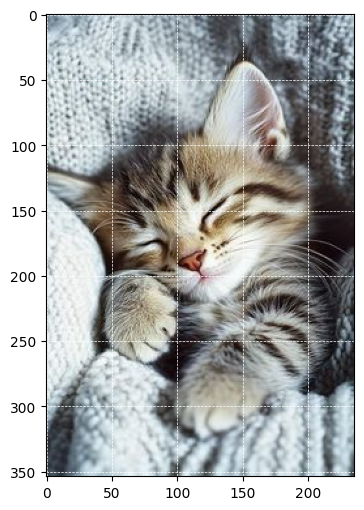

In [28]:
plt.figure(figsize=(8, 6))
plt.imshow(obj_img)
plt.axis('on')

# grade a cada N pixels
passo = 50 

plt.xticks(np.arange(0, larg, passo))
plt.yticks(np.arange(0, alt, passo))
plt.grid(color='white', linestyle='--', linewidth=0.5)

plt.show()

### Vamos então ao recorte da região de interesse (rosto do gato)

Vendo a imagem com grid, podemos notar que o rosto em si começa nas seguintes coordenadas (aproximadamente):
- X = 50
- Y = 125

O rosto termina em:
- X = 160
- Y = 225

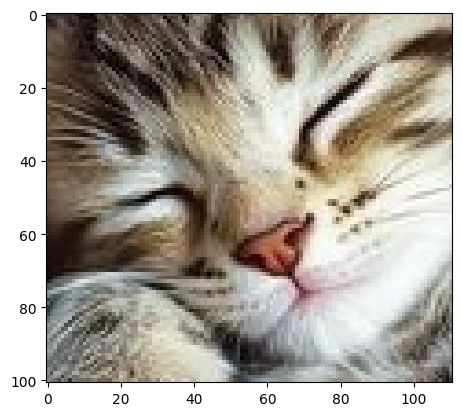

In [29]:
rosto_img = obj_img[125:226, 50:161] # y inicial : y final, x inicial : x final
plt.imshow(rosto_img)
plt.show()

### Vamos agora colocar esse recorte na nossa imagem original

Vamos colocar o rosto no canto superior esquerdo da imagem original (coordenadas 0,0)

In [30]:
rosto_img.shape

(101, 111, 3)

#### Delimitando a região da imagem original que vai receber o recorte

In [31]:
obj_img[0:101, 0:111] = rosto_img

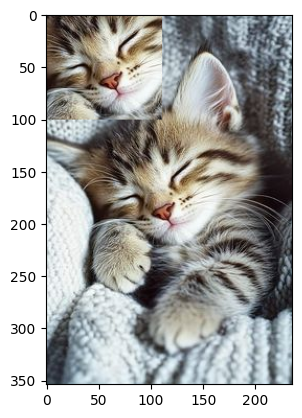

In [32]:
plt.imshow(obj_img)
plt.show()

> DICA: Podemos colocar essa imagem recortada EM QUALQUER LUGAR da imagem original! Basta saber o X e Y de onde você quer colocar, e ajustar para ter o tamanho exato da imagem recortada

# Aula 002 - Fim